In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
from google.colab import files

uploaded_file = files.upload()

Saving diamonds-1.csv to diamonds-1.csv


In [3]:
# load in the dataset into a pandas dataframe
diamonds = pd.read_csv("diamonds-1.csv")

In [4]:
type(diamonds)

pandas.core.frame.DataFrame

In [5]:
diamonds.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


## Dataset Overview

Before running straight into the exploration, let's just take a moment to get a high-level overview of the dataset. We can refer back to these points if we need to get our bearings on what we should expect to see from each variable.

Price is in US dollars

Carat weight of the diamond

Cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm

y width in mm

z depth in m

depth: The height of a diamond

table: The width of the diamond’s table expressed as a percentage of its average diameter

In [8]:
# high-level overview of data shape and composition - Number of rows and columns
diamonds.shape

(53940, 10)

In [9]:
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [10]:
# Data types of the columns
print(diamonds.dtypes)

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


In [11]:
# last 10 rows of the dataset
diamonds.tail(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
53930,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53931,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43
53932,0.70,Very Good,E,VS2,60.5,59.0,2757,5.71,5.76,3.47
53933,0.70,Very Good,E,VS2,61.2,59.0,2757,5.69,5.72,3.49
53934,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [12]:
# descriptive statistics for numeric variables
diamonds.describe()


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [13]:
# Check null values
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## Univariate Exploration

Let's start our exploration by looking at the main variable of interest: price. Is the distribution skewed or symmetric? Is it unimodal or multimodal?

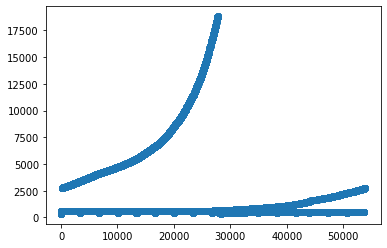

In [5]:
# univariate plot of diamond prices
plt.scatter(diamonds.index,diamonds['price'])

The distribution is skewed  and it is unimodal

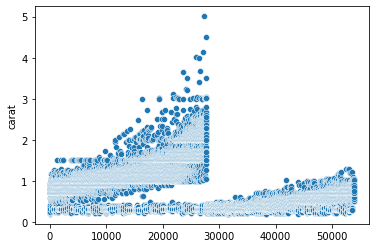

In [ ]:
# univariate plot of diamond carats using seaborn 
import seaborn as sns
sns.scatterplot(x=diamonds.index,y = diamonds['carat'])

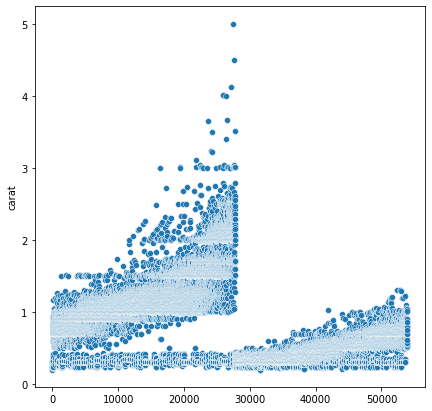

In [8]:
#Change figure size to (7,7)
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(x=diamonds.index, y= diamonds['carat'], ax = ax)

Text(0, 0.5, 'carat')

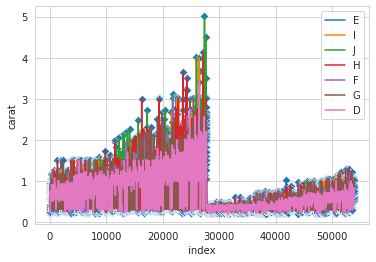

In [19]:
#Line plot of sns showing the carat distribution based on color
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_style(style='whitegrid')
sns.lineplot(data=diamonds, x=diamonds.index, y=diamonds['carat'], hue=diamonds.color)
sns.scatterplot(x=diamonds.index, y= diamonds['carat'], marker="D")
plt.xlabel("index")
plt.ylabel("carat")

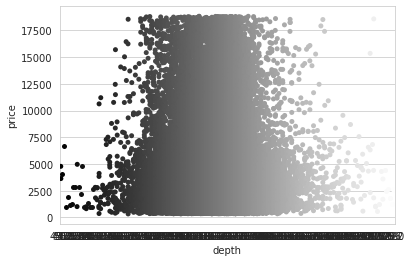

In [25]:
'''
The strip plot is similar to a scatter plot. It is often used along with other kinds of plots for better analysis. 
It is used to visualize the distribution of data points of the variable.
'''
# Get the handles and labels. For this example it'll be 2 tuples
# of length 4 each.

import seaborn as sns

sns.set_style(style='whitegrid')
# sns.lineplot(x=diamonds.depth, y=diamonds.price, palette='gist_gray')
sns.stripplot(x=diamonds['depth'], y=diamonds['price'], palette='gist_gray')




(array([25335.,  9328.,  7393.,  3878.,  2364.,  1745.,  1306.,  1002.,
          863.,   726.]),
 array([  326. ,  2175.7,  4025.4,  5875.1,  7724.8,  9574.5, 11424.2,
        13273.9, 15123.6, 16973.3, 18823. ]),
 <a list of 10 Patch objects>)

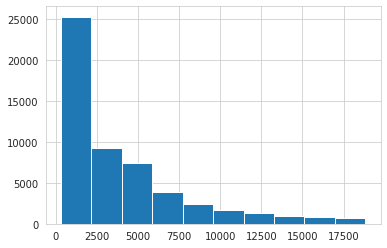

In [40]:
#histogram of price

sns.set_style('whitegrid')
plt.hist(diamonds['price'], density=False, bins=10) 
# plt.axis([0, 16000, 0, 25000])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Price')

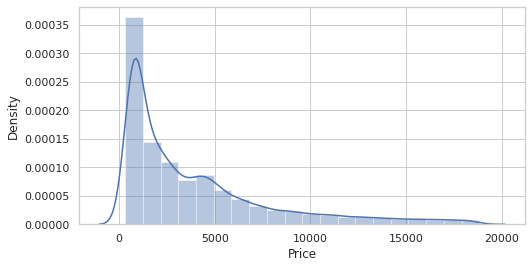

In [71]:
#histplot of sns

import seaborn as sns
'''
If kde (kernel density) parameter is set to False only the histogram is viewed. 
There are many parameters like bins (indicating the number of bins in histogram allowed in the plot),
 color, etc; which can be set to obtain the desired output.
'''

sns.set_style('whitegrid')
sns.distplot(diamonds["price"], bins=20, kde=True)
plt.ylabel("Density")
plt.xlabel("Price")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


(-10000.0, 20000.0, 0.0, 0.0003)

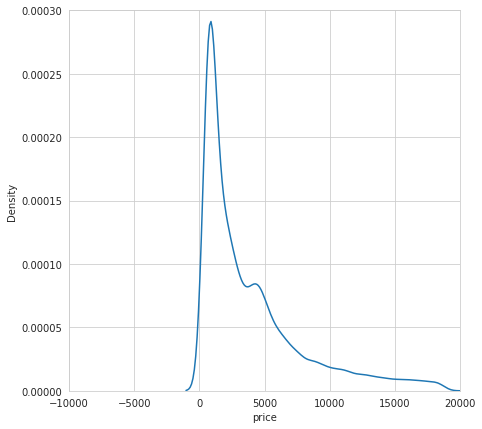

In [19]:
#A density plot is like a smoother version of a histogram. Generally, the kernel density estimate 
#is used in density plots to show the probability density function of the variable. 
#A continuous curve, which is the kernel is drawn to generate a smooth density estimation for the whole data.
#Density plot

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.figure(figsize=(7, 7))
sns.distplot(diamonds['price'], hist=False, bins=20, kde=True)
plt.axis([-10000, 20000, 0, 0.00030])

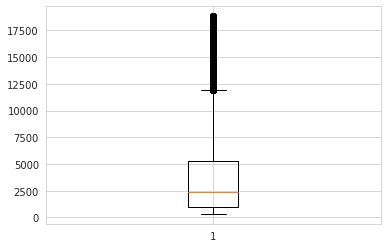

In [21]:
#Box plot
#https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

import matplotlib.pyplot as plt

plt.boxplot(diamonds['price'])
plt.show(block=True)



What is your observation of Price distribution?

Price distribution in box plot is right skewed having median a of 2500, with minimum of 625 and maximum of 2700 approximatley. 

Next, create a plot of our first diamond 'C' metric: carat weight. Is there an interesting pattern in these values?

(array([2.5155e+04, 1.8626e+04, 7.1290e+03, 2.3490e+03, 6.1400e+02,
        5.3000e+01, 6.0000e+00, 5.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([0.2  , 0.681, 1.162, 1.643, 2.124, 2.605, 3.086, 3.567, 4.048,
        4.529, 5.01 ]),
 <a list of 10 Patch objects>)

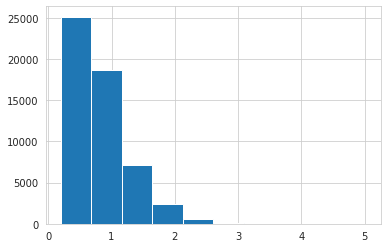

In [25]:
# univariate plot of carat weights

import seaborn as sns

sns.set_style('whitegrid')
plt.hist(diamonds['carat'], density=False, bins=10) 

Carat distribution comment: The diamond distribution for carat shows unimodal variate having maximum peak at 25000 with gradually descreasing, it also presents right skewed distribution.

Now, let's move on to exploring the other three 'C' quality measures: cut, color, and clarity. For each of these measures, does the data we have tend to be higher on the quality scale, or lower?

In [34]:
#Your code here

diamonds.groupby(["cut", "color", "clarity"])["clarity"].count()

cut        color  clarity
Fair       D      I1           4
                  IF           3
                  SI1         58
                  SI2         56
                  VS1          5
                            ... 
Very Good  J      SI2        128
                  VS1        120
                  VS2        184
                  VVS1        19
                  VVS2        29
Name: clarity, Length: 276, dtype: int64

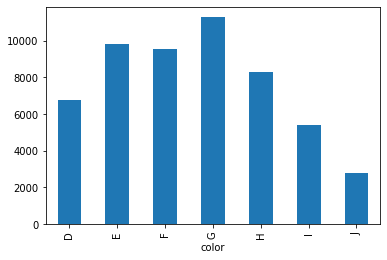

In [9]:
# bar plot of cut grouped by color

import matplotlib.pyplot as plt
import pandas as pd

diamonds.groupby(["color"])["color"].count().plot.bar()


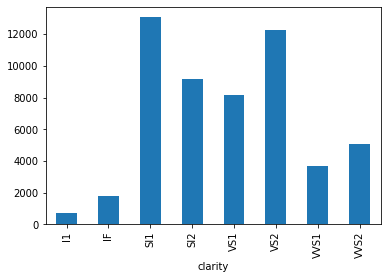

In [10]:
# bar plot of cut grouped by clarity

diamonds.groupby(["clarity"])["clarity"].count().plot.bar()

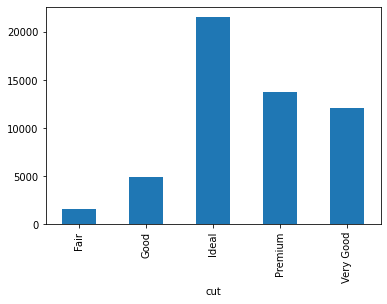

In [11]:
grouped2 = diamonds.groupby(['cut'])['cut'].count()
grouped2.plot.bar()
plt.show()

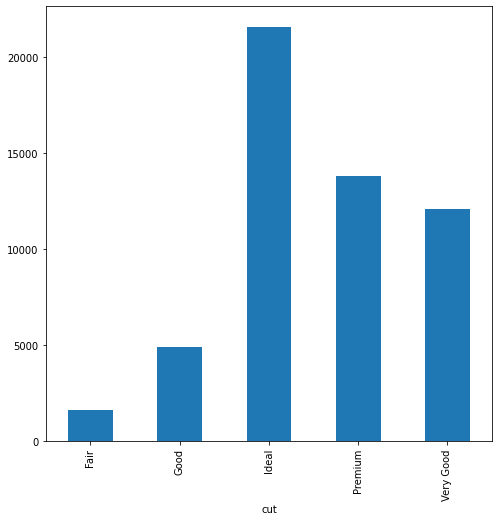

In [12]:
grouped2.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)
plt.show()

Text(0.5, 0.98, 'Boxplot grouped by clarity')

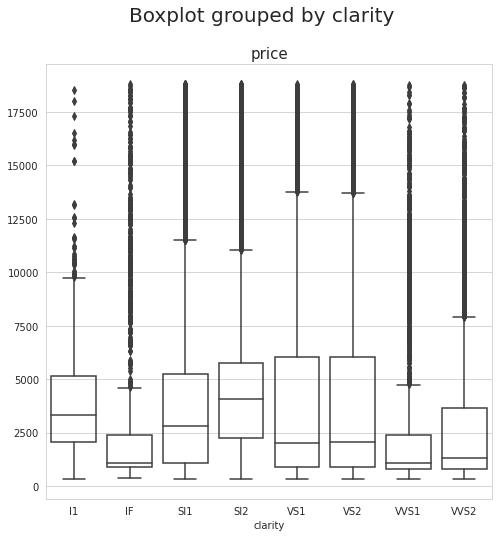

In [14]:
#boxplot of price grouped by clarity

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


# data_i1 = diamonds[(diamonds['clarity'] == 'I1') & (diamonds['price'] < 18000) ]
# data_if = diamonds[(diamonds['clarity'] == 'IF') & (diamonds['price'] < 18000)]
# data_si1 = diamonds[(diamonds['clarity'] == 'SI1') & (diamonds['price'] < 18000)]
# data_si2 = diamonds[(diamonds['clarity'] == 'SI2') & (diamonds['price'] < 18000)]
# data_vs1 = diamonds[(diamonds['clarity'] == 'VS1') & (diamonds['price'] < 18000)]
# data_vs2 = diamonds[(diamonds['clarity'] == 'VS2') & (diamonds['price'] < 18000)]
# data_ws1 = diamonds[(diamonds['clarity'] == 'VVS1') & (diamonds['price'] < 18000)]
# data_ws2 = diamonds[(diamonds['clarity'] == 'VVS2') & (diamonds['price'] < 18000)]

# plt.figure(figsize = [7,7])
# plt.boxplot([data_i1['price'], data_if['price'], data_si1['price'], 
#              data_si2['price'], data_vs1['price'], data_vs2['price'], 
#              data_ws1['price'], data_ws2['price']])

# plt.xticks((1,2,3,4,5,6,7,8), ['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'])

# plt.title("Boxplot grouped by clarity\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
# plt.xlabel("Clarity", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
# plt.ylabel("Price", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

sns.set_style(style='whitegrid')
plt.figure(figsize = [8,8])
data_set = sns.boxplot(x=diamonds['clarity'], y=diamonds['price'], width=0.8, order=['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'], boxprops=dict(facecolor='none'))
data_set.set(ylabel=None)
plt.title('price', fontsize=15)
plt.suptitle('Boxplot grouped by clarity', fontsize=20)



Text(0.5, 0.98, 'Boxplot grouped by clarity')

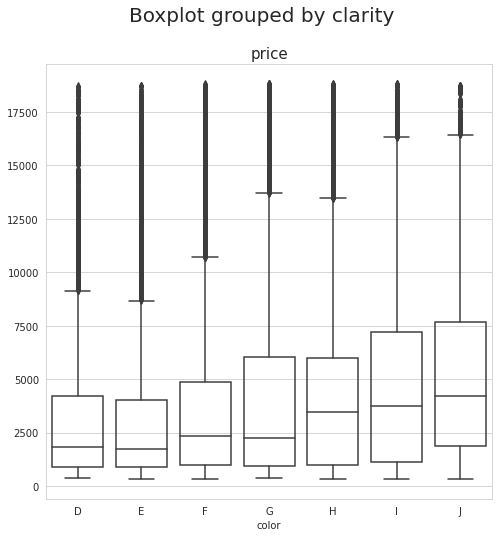

In [13]:
##boxplot of price grouped by color

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


# data_d = diamonds[(diamonds['color'] == 'D') & (diamonds['price'] < 18000) ]
# data_e = diamonds[(diamonds['color'] == 'E') & (diamonds['price'] < 18000)]
# data_f = diamonds[(diamonds['color'] == 'F') & (diamonds['price'] < 18000)]
# data_g = diamonds[(diamonds['color'] == 'G') & (diamonds['price'] < 18000)]
# data_h = diamonds[(diamonds['color'] == 'H') & (diamonds['price'] < 18000)]
# data_i = diamonds[(diamonds['color'] == 'I') & (diamonds['price'] < 18000)]
# data_j = diamonds[(diamonds['color'] == 'J') & (diamonds['price'] < 18000)]

# plt.figure(figsize = [7,7])
# plt.boxplot([data_d['price'], data_e['price'], data_f['price'], 
#              data_g['price'], data_h['price'], data_i['price'], 
#              data_j['price']])

# plt.xticks((1,2,3,4,5,6,7), ['D', 'E', 'F', 'G', 'H', 'I', 'J'])

# plt.suptitle("Boxplot grouped by color", fontsize=20)
# plt.title("price", fontsize=15)
# plt.xlabel("Color", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
# plt.ylabel("Price", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

sns.set_style(style='whitegrid')
plt.figure(figsize = [8,8])
data_set = sns.boxplot(x=diamonds['color'], y=diamonds['price'], width=0.8, order=['D', 'E', 'F', 'G', 'H', 'I', 'J'], boxprops=dict(facecolor='none'))
data_set.set(ylabel=None)
plt.title('price', fontsize=15)
plt.suptitle('Boxplot grouped by clarity', fontsize=20)

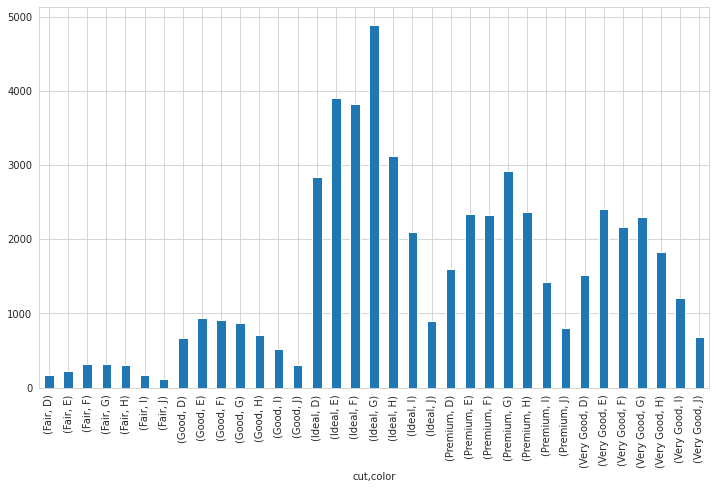

In [52]:
#bar plot grouped by cut and color on clarity

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12,7))
diamonds.groupby(["cut", "color"])["clarity"].count().plot.bar(ax)

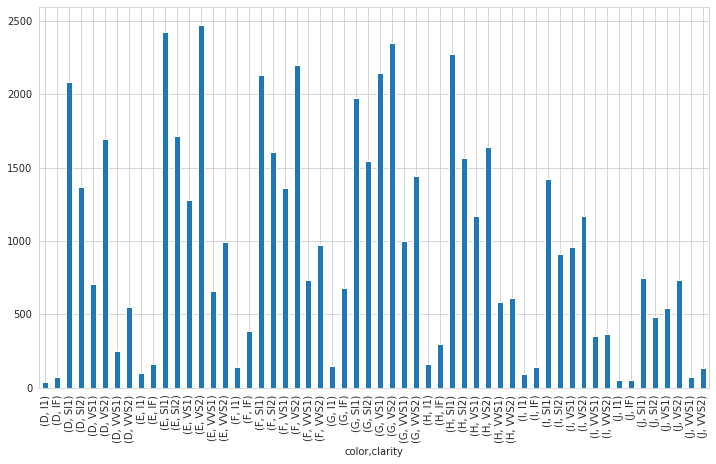

In [51]:
#bar plot cut grouped by color and clarity

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12,7))
diamonds.groupby(["color", "clarity"])["cut"].count().plot.bar(ax)

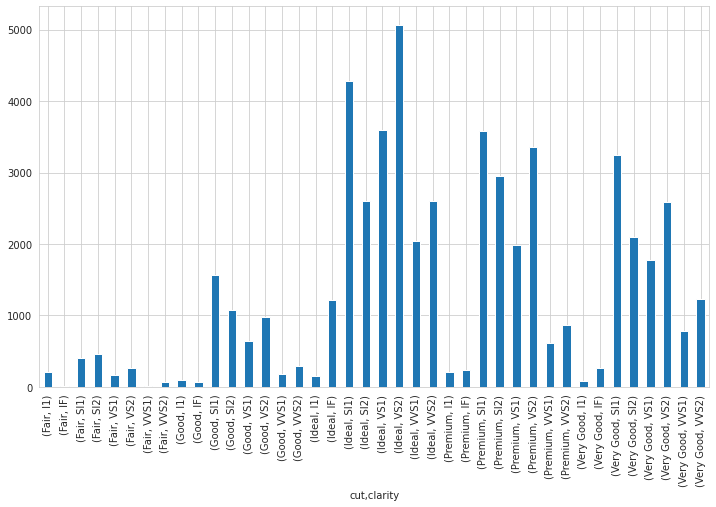

In [50]:
#bar plot color grouped by cut and clarity

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12,7))
diamonds.groupby(["cut", "clarity"])["color"].count().plot.bar(ax)

Write the General categorical feature comments below:

Cut distribution comment: The diamond distribution for cut has left skewed distribution with an unimodal variate, showing a highest peak for Ideal cuts and mininum cuts for fair.

Color distribution comment: The diamond distribution for color is slightly right skewed distribution and has unimodal variate with color 'G' having the highest peak and 'J' having minimum color

Clarity distribution comment: The diamond distribution for clarity having almost bimodal variation with hight peak of 12000-13000 for SI1 and VS2. With minimum clarity variate for I1 .

**Categorical attribute visualization**

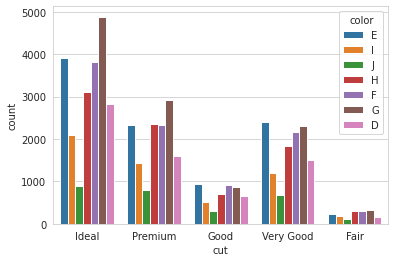

In [14]:
#A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.
#sns count plot of cut grouped by color
import seaborn as sns

sns.set_style('whitegrid')
sns.countplot(data=diamonds, x=diamonds['cut'], hue = 'color')


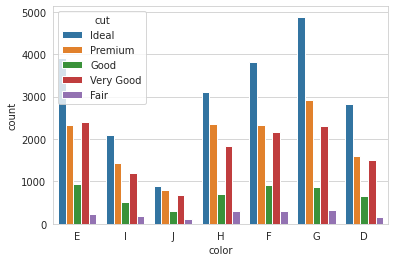

In [15]:
#count plot of color grouped by cut

import seaborn as sns

sns.set_style('whitegrid')
sns.countplot(data=diamonds, x=diamonds['color'], hue = 'cut')

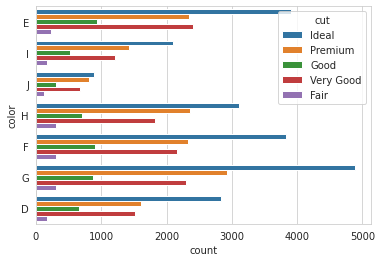

In [17]:
#count plot of cut grouped by color - vertical display

import seaborn as sns

sns.set_style('whitegrid')
sns.countplot(data=diamonds, y=diamonds['color'], hue = 'cut')

**BarPlot :**
A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars.

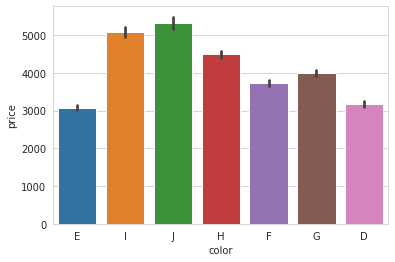

In [56]:
#sns bar plot of color, price

sns.barplot(x=diamonds['color'], y=diamonds['price'])

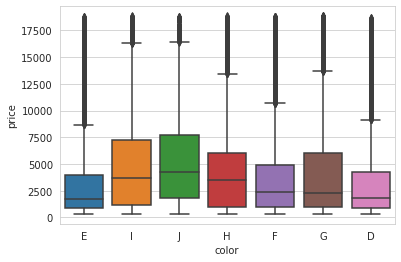

In [55]:
##sns box plot of color, price


sns.boxplot(x=diamonds['color'], y=diamonds['price'])

A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared.

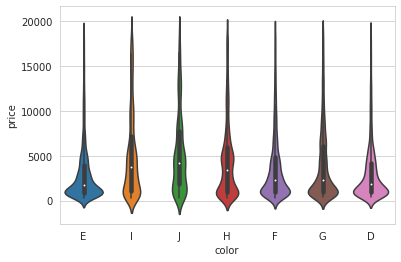

In [57]:
# violin plot for the above

sns.violinplot(x=diamonds['color'], y=diamonds['price'])

****End****